In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# data: https://wellcome.ac.uk/reports/wellcome-global-monitor/2018
df_vac = pd.read_csv('vaccines.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [2]:
#Clean names
whr_names = {'Bosnia and Herzegovina': 'Bosnia and Herz.',
            'Congo, Rep.' : 'Dem. Rep. Congo',
            'Czech Republic' : 'Czech Rep.',
            'Dominican Republic' : 'Dominican Rep.',
            'Ivory Coast':"Côte d'Ivoire", 
            'Northern Cyprus' : 'N. Cyprus',
            'South Korea' : 'Korea',
            'Laos': 'Lao PDR',
            'The Gambia': 'Gambia',
            'Eswatini': 'Swaziland'}

for name, clean_name in whr_names.items():
    df_vac['Country'].loc[df_vac.Country == name] = clean_name

# Check mismatched names
print('in data and not in map:')
for name in df_vac['Country']:
    if str(name) not in world['name'].values:
        print(name)   
print('\nin map and not in data:')
for name in world['name']:
    if str(name) not in df_vac['Country'].values:
        print(name)

C:\Users\thiag\.conda\envs\Training\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


in data and not in map:
Comoros
Malta
Mauritius
Singapore

in map and not in data:
Angola
Antarctica
Fr. S. Antarctic Lands
Bahamas
Belize
Brunei
Bhutan
Central African Rep.
Congo
Cuba
Djibouti
Eritrea
Fiji
Falkland Is.
Guinea-Bissau
Eq. Guinea
Greenland
Guyana
Jamaica
Lesotho
New Caledonia
Oman
Papua New Guinea
Puerto Rico
Dem. Rep. Korea
Qatar
W. Sahara
Sudan
S. Sudan
Solomon Is.
Somaliland
Somalia
Suriname
Syria
Timor-Leste
Trinidad and Tobago
Vanuatu


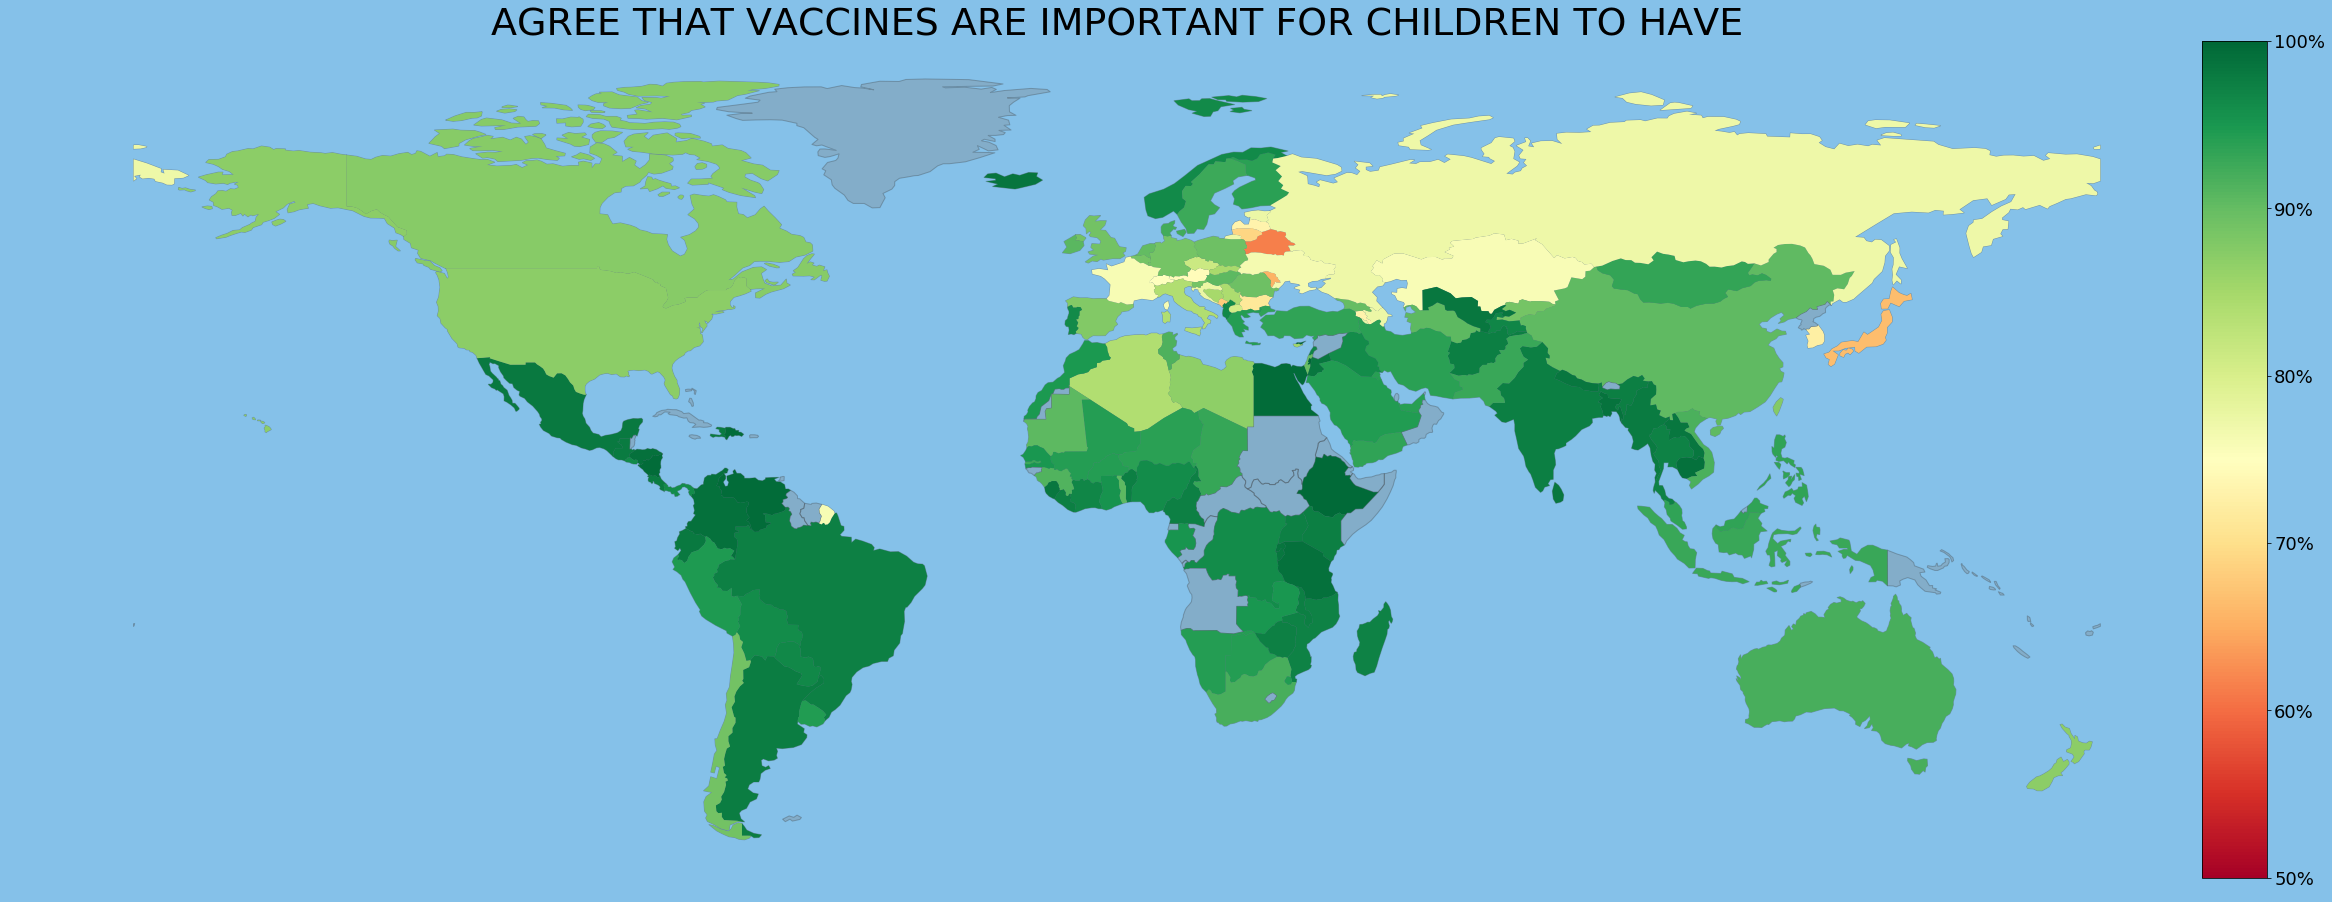

In [3]:
# Define max and mix for the colors
vmin=0.5
vmax=1

# load maps and remove antarctic
df_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map = df_map[~df_map.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]

# build a dataframe with the selected field
df_item = df_vac.filter(items=['Country','Agree']).copy()
df_map = df_map.merge(df_item, how='left',left_on = 'name', right_on = 'Country')
    # set figure, axis and bg color
fig, ax = plt.subplots(1,1,figsize=(40,20))
fig.patch.set_facecolor('#85C1E9')

# plot a background map
df_map.plot(ax=ax, color='grey', alpha=0.3, edgecolor='0.2')

# drop not listed countries and plot colormap
df_map.dropna(inplace=True)
df_map.plot(column='Agree', cmap='RdYlGn', ax=ax, vmin=vmin, vmax=vmax)
# title
plt.title('Agree that vaccines are important for children to have'.upper(), fontsize='38')

# set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_yticklabels(['50%', '60%', '70%', '80%', '90%', '100%'])
cbar.ax.tick_params(labelsize=18)

# hide map axis
ax.axis('off')
plt.savefig('1.png', facecolor=fig.get_facecolor(), edgecolor='none')

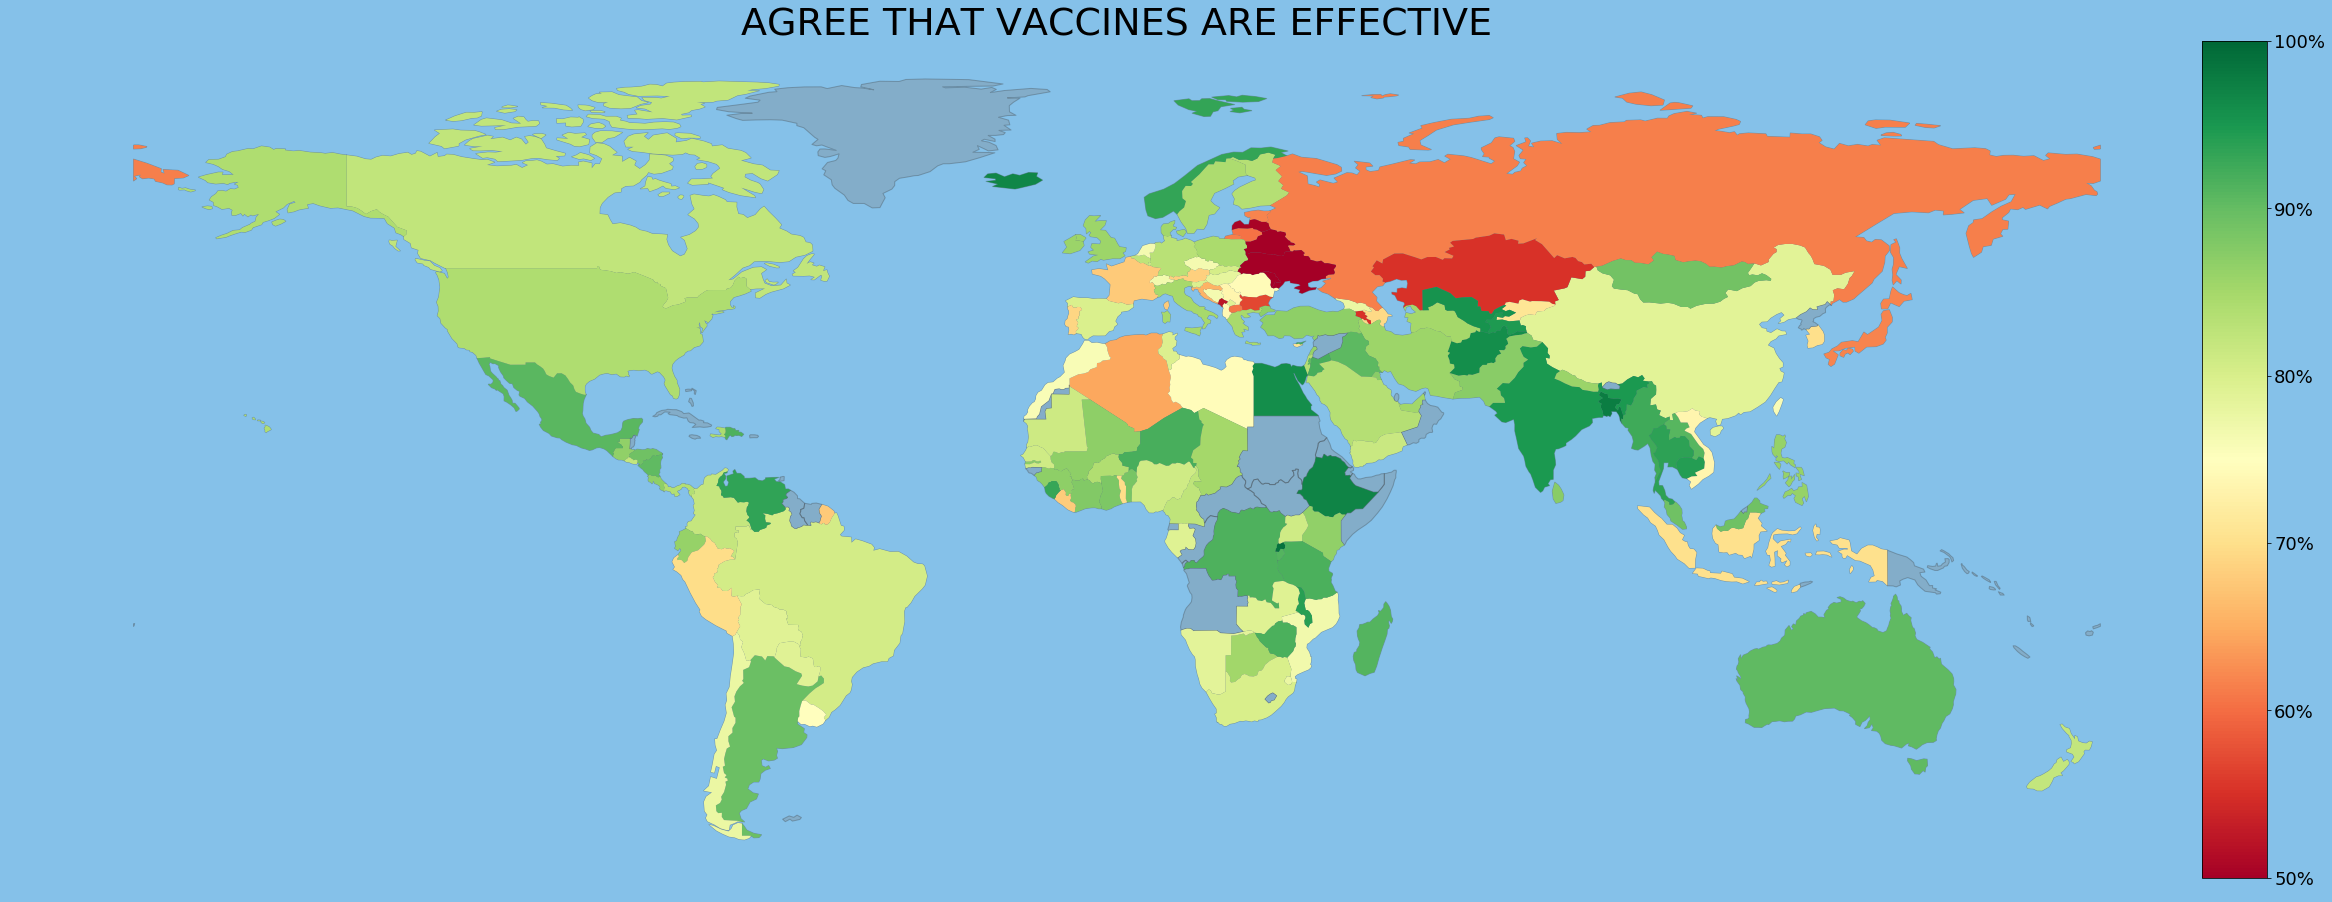

In [4]:
vmin=0.5
vmax=1

# load maps and remove antarctic
df_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map = df_map[~df_map.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]

# build a dataframe with the selected field
df_item = df_vac.filter(items=['Country','Agree_2']).copy()
df_map = df_map.merge(df_item, how='left',left_on = 'name', right_on = 'Country')
    # set figure, axis and bg color
fig, ax = plt.subplots(1,1,figsize=(40,20))
fig.patch.set_facecolor('#85C1E9')

# plot a background map
df_map.plot(ax=ax, color='grey', alpha=0.3, edgecolor='0.2')

# drop not listed countries and plot colormap
df_map.dropna(inplace=True)
df_map.plot(column='Agree_2', cmap='RdYlGn', ax=ax, vmin=vmin, vmax=vmax)
# title
plt.title('Agree that vaccines are effective'.upper(), fontsize='38')

# set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_yticklabels(['50%', '60%', '70%', '80%', '90%', '100%'])
cbar.ax.tick_params(labelsize=18)

# hide map axis
ax.axis('off')
plt.savefig('2.png', facecolor=fig.get_facecolor(), edgecolor='none')

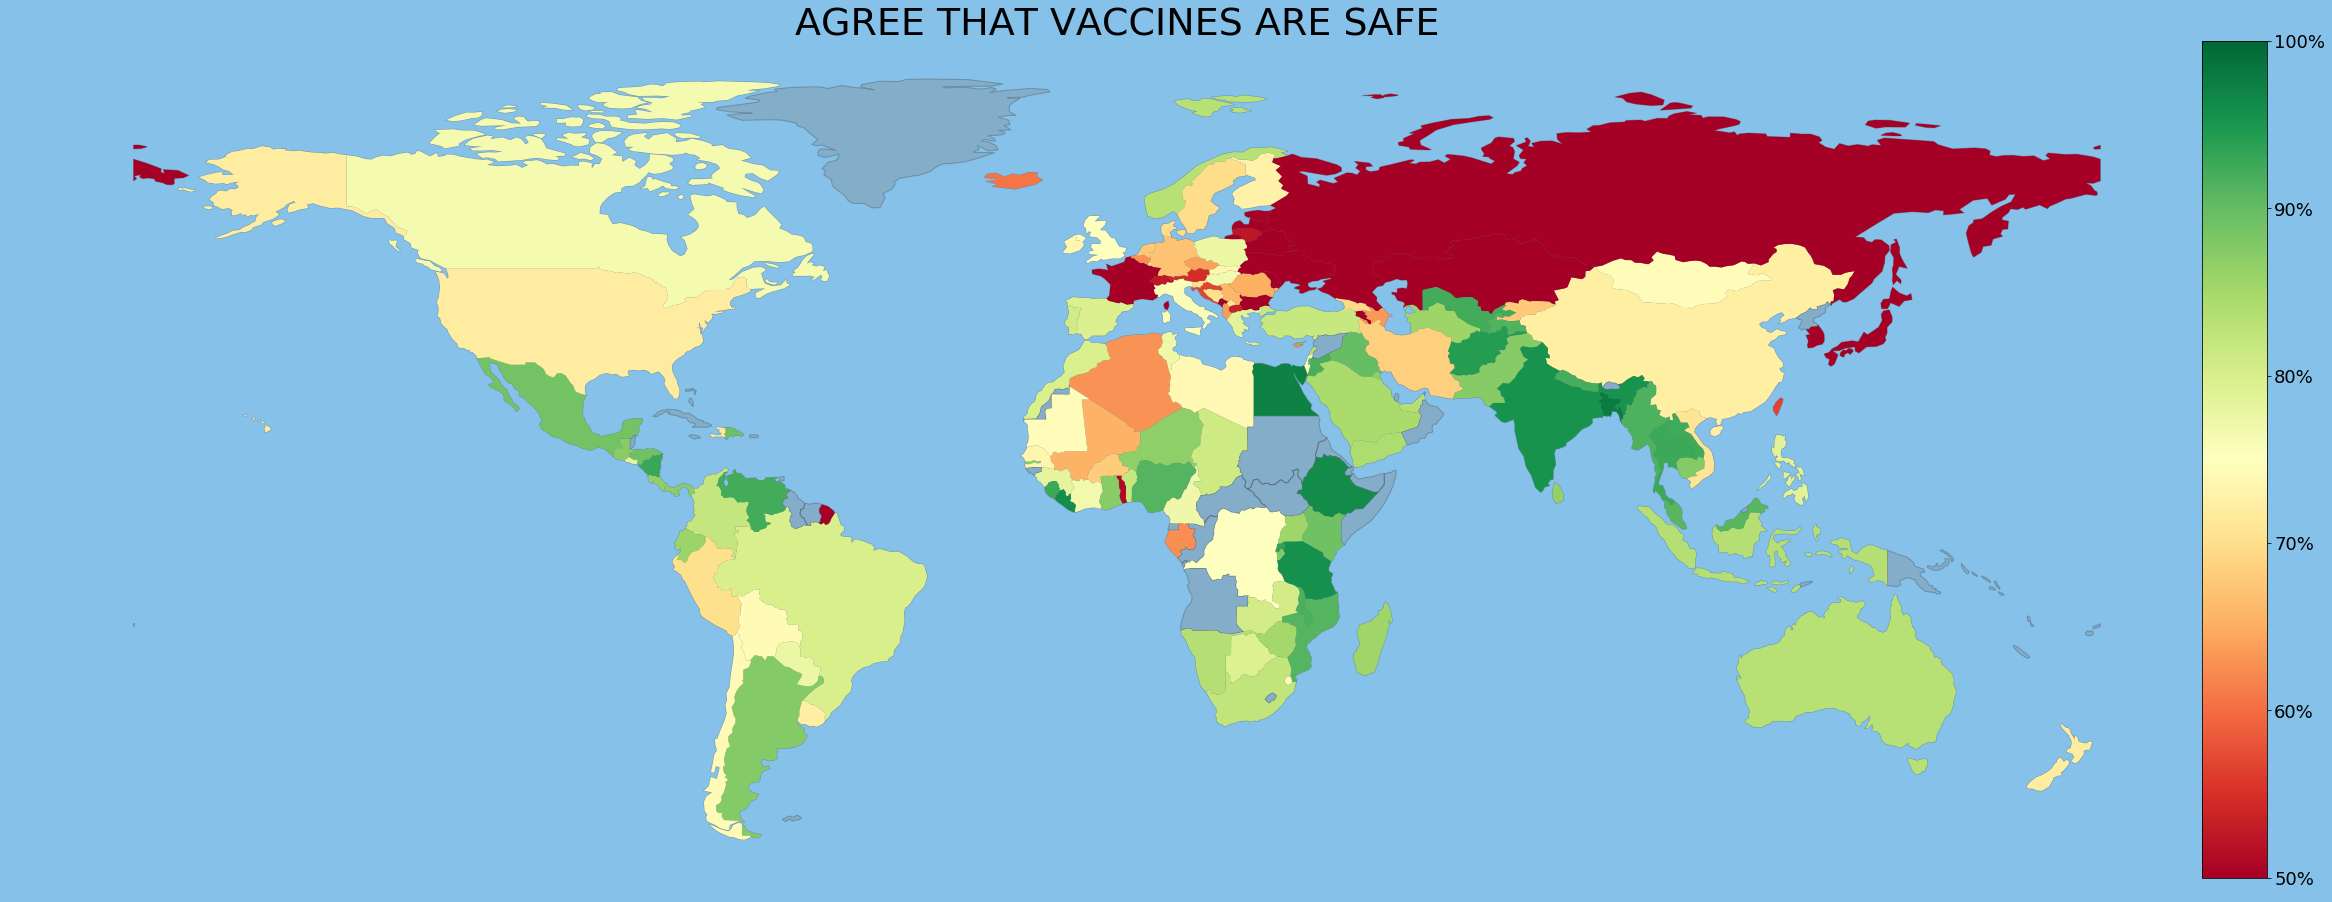

In [5]:
vmin=0.5
vmax=1

# load maps and remove antarctic
df_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map = df_map[~df_map.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]

# build a dataframe with the selected field
df_item = df_vac.filter(items=['Country','Agree_3']).copy()
df_map = df_map.merge(df_item, how='left',left_on = 'name', right_on = 'Country')
    # set figure, axis and bg color
fig, ax = plt.subplots(1,1,figsize=(40,20))
fig.patch.set_facecolor('#85C1E9')

# plot a background map
df_map.plot(ax=ax, color='grey', alpha=0.3, edgecolor='0.2')

# drop not listed countries and plot colormap
df_map.dropna(inplace=True)
df_map.plot(column='Agree_3', cmap='RdYlGn', ax=ax, vmin=vmin, vmax=vmax)
# title
plt.title('Agree that vaccines are safe'.upper(), fontsize='38')

# set an axis for the color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
# color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.set_yticklabels(['50%', '60%', '70%', '80%', '90%', '100%'])
cbar.ax.tick_params(labelsize=18)

# hide map axis
ax.axis('off')
plt.savefig('3.png', facecolor=fig.get_facecolor(), edgecolor='none')